In [4]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 

In [5]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])


array([0, 1, 0])

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1
|   |--- feature_3 >  0.50
|   |   |--- class: 0



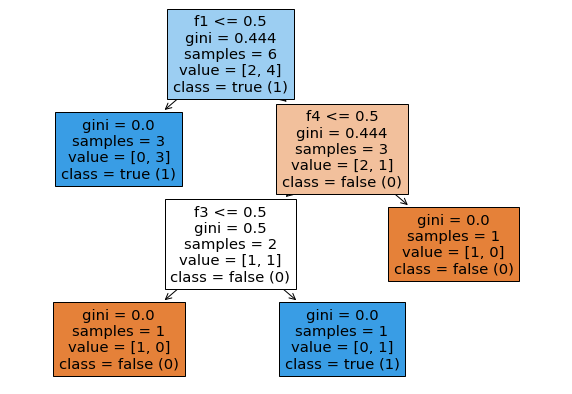

In [7]:
text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("f1","f2" , "f3", "f4"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


|--- feature_2 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: 1
|   |--- feature_0 >  0.50
|   |   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 1



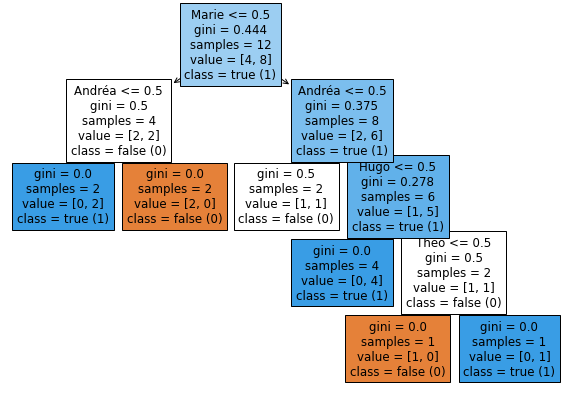

In [8]:
# X is the training set 
# Each example in X has 4 binary features
X = [[1, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0], [0, 1, 1, 0], [1, 1, 1, 1], [1, 0, 0, 0], [0, 1, 1, 0], [1, 0, 1, 0], [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])

text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("Andréa","Théo" , "Marie", "Hugo"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


In [10]:
To reduce the dataset, we can remove the origin criterion.

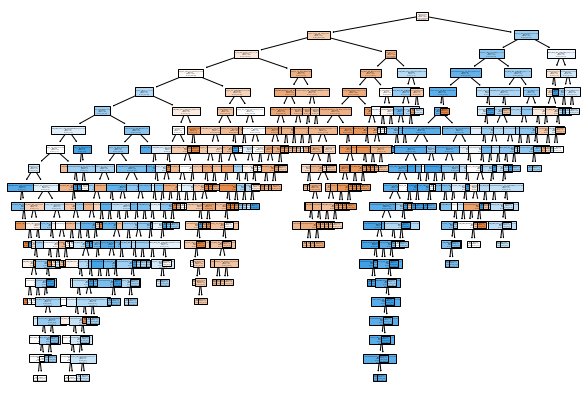

In [20]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_examples, train_labels)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= features,
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

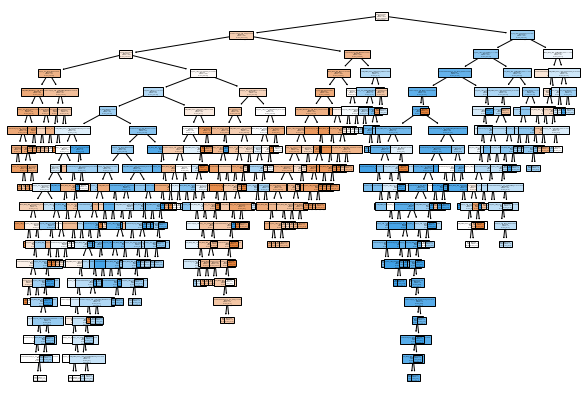

In [21]:
clf = tree.DecisionTreeClassifier(splitter="random", max_depth=None,min_samples_split=2)
clf = clf.fit(train_examples, train_labels)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= features,
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

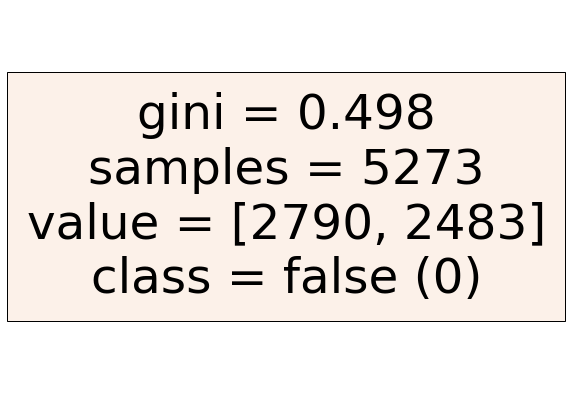

In [28]:
clf = tree.DecisionTreeClassifier(splitter="best", max_depth=0.5,min_samples_split=2)
clf = clf.fit(train_examples, train_labels)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= features,
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

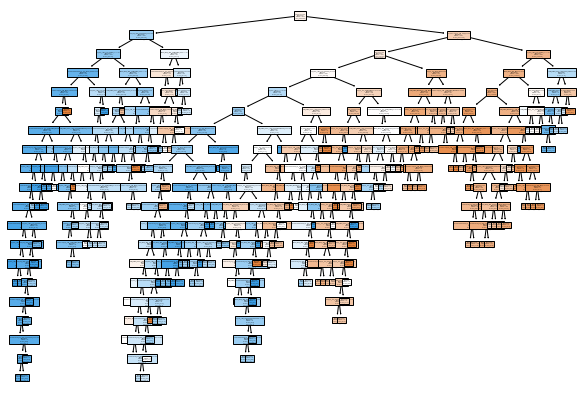

In [29]:
clf = tree.DecisionTreeClassifier(splitter="best", max_depth=None,min_samples_split=10)
clf = clf.fit(train_examples, train_labels)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= features,
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split

train_e, test_e, train_l, test_l = train_test_split(train_examples, train_labels, test_size = 0.2, train_size = 0.8)


clf = clf.fit(train_e, train_l)

clf.score(test_e, test_l)

0.6729857819905213

In [41]:
#Le faire plusieurs fois pour la cross evalutation

In [58]:
for i in range(0, 5) :
    train_e, test_e, train_l, test_l = train_test_split(train_examples, train_labels, test_size = 0.2, train_size = 0.8)
    clf = clf.fit(train_e, train_l)
    print(clf.score(test_e, test_l))

0.6483412322274882
0.6644549763033175
0.6606635071090048
0.6578199052132702
0.6625592417061611
